In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from itertools import product, combinations
%matplotlib inline

In [29]:
def reading_from_file(file_name, num_passes):
    array_0 = np.loadtxt(file_name);
    array = []
    i = 0
    while i < array_0.shape[0]:
        array.append(array_0[i]);
        i+=num_passes;
    array = np.array(array)
    return array

def norm_vector(array):    
    sqrt_vec = np.vectorize(sqrt);
    array_mod = sqrt_vec(sum(array.T**2))
    #angular_velocity = angular_velocity[:100, :]
    return array_mod 

def plt_graph_and_save(x, y, label, name_file_to_save):
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(x, y, label = label)

    ax.legend()
    fig.savefig(name_file_to_save)
    plt.close(fig)

In [113]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

def plot_vector_on_Sphere(vector, label):
    fig = plt.figure()
    ax =  fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')

    class Arrow3D(FancyArrowPatch):

        def __init__(self, xs, ys, zs, *args, **kwargs):
            FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
            FancyArrowPatch.draw(self, renderer)

    arrow = Arrow3D([], [], [], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")

    #fig = plt.figure()
    #ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    #line, = ax.plot([], [], lw=2)

    # initialization function: plot the background of each frame
    # draw cube
    #r = [-1, 1]
    #for s, e in combinations(np.array(list(product(r, r, r))), 2):
    #    if np.sum(np.abs(s-e)) == r[1]-r[0]:
    #        ax.plot3D(*zip(s, e), color="r")
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 1 * np.outer(np.cos(u), np.sin(v))
    y = 1 * np.outer(np.sin(u), np.sin(v))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
    #for i in range(2):
    #    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
    elev = 10.0
    rot = 80.0 / 180 * np.pi
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.05)
    #calculate vectors for "vertical" circle
    a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
    b = np.array([0, 1, 0])
    b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
    ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
    horiz_front = np.linspace(0, np.pi, 100)
    ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
    vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
    ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
    ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

    arrow.__init__([0, vector[0,0]], [0, vector[0,1]], [0, vector[0,2]], mutation_scale=20,
           lw=1, arrowstyle="-|>", color="y")
    ax.add_artist(arrow)

    p,q,r = (vector[:,i] for i in range(3))
    ax.plot(p,q,r, label=label)

    fig.savefig(label+"_trajectory.png")
    plt.show()

In [114]:
planets = reading_from_file('planets.dat', 100)
planets.shape

(143, 9)

In [120]:
angular_velocity = reading_from_file('Angular_velocity.dat', 100);
av_mod = norm_vector(angular_velocity)
angular_velocity.shape

(143, 3)

In [121]:
angular_velocity_Rot = reading_from_file('Angular_velocity_Rot.dat', 100);
av_mod_Rot = norm_vector(angular_velocity_Rot)
angular_velocity_Rot.shape

(143, 3)

In [117]:
momentum = reading_from_file('momentum.dat', 100);
momentum_mod = norm_vector(momentum)
momentum.shape

(143, 3)

In [122]:
momentum_Rot = reading_from_file('momentum_Rot.dat', 100);
momentum_mod_Rot = norm_vector(momentum_Rot)
momentum_Rot.shape

(143, 3)

In [123]:
distances = reading_from_file('distances.dat', 100);

Distance_to_Earth = distances[:, 1]
Distance_to_Earth.shape

(143,)

In [124]:
timeline = reading_from_file('timeline.dat', 100);
timeline.shape

(143,)

In [125]:
plt_graph_and_save(timeline, momentum_mod, "Module momentum", "Module_momentum.png")
plt_graph_and_save(timeline, av_mod, "Module angular velocity", "Module_angular_velocity.png")
plt_graph_and_save(timeline, momentum_mod_Rot, "Module momentum Rot", "Module_momentum_Rot.png")
plt_graph_and_save(timeline, av_mod_Rot, "Module angular velocity Rot", "Module_angular_velocity_Rot.png")
plt_graph_and_save(timeline, Distance_to_Earth, "Distance to Earth", "Distance_to_Earth.png")

In [126]:
plt_graph_and_save(timeline, angular_velocity[:, 0], "Angular velocity p", "Angular_velocity_p.png")
plt_graph_and_save(timeline, angular_velocity[:, 1], "Angular velocity q", "Angular_velocity_q.png")
plt_graph_and_save(timeline, angular_velocity[:, 2], "Angular velocity r", "Angular_velocity_r.png")

In [127]:
plt_graph_and_save(timeline, angular_velocity_Rot[:, 0], "Angular velocity p Rot", "Angular_velocity_p_Rot.png")
plt_graph_and_save(timeline, angular_velocity_Rot[:, 1], "Angular velocity q Rot", "Angular_velocity_q_Rot.png")
plt_graph_and_save(timeline, angular_velocity_Rot[:, 2], "Angular velocity r Rot", "Angular_velocity_r_Rot.png")

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')

xAsteroid, yAsteroid, zAsteroid, xEarth, yEarth, zEarth = (planets[:,i] for i in range(6))
ax.plot(xEarth, yEarth, zEarth, label='Planet')
ax.plot(xAsteroid, yAsteroid, zAsteroid, label='Asteroid')

ax.legend()
fig.savefig("planets_trajectories.png")
plt.close(fig)    # close the figure

In [110]:
angular_velocity = reading_from_file('Angular_velocity.dat', 1);
av_mod = norm_vector(angular_velocity)
angular_velocity = angular_velocity/av_mod[:, np.newaxis]
angular_velocity.shape
plot_vector_on_Sphere(angular_velocity, "Angular velocity")

(6979, 3)

In [ ]:
angular_velocity_Rot = reading_from_file('Angular_velocity_Rot.dat', 1);
av_mod_Rot = norm_vector(angular_velocity_Rot)
angular_velocity_Rot = angular_velocity_Rot/av_mod_Rot[:, np.newaxis]
angular_velocity_Rot.shape
plot_vector_on_Sphere(angular_velocity_Rot, "Angular velocity Rot")

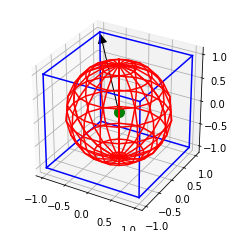

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")
# draw sphere
u, v = np.mgrid[0:1*np.pi:10j, 0:2*np.pi:20j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
# draw a point
ax.scatter([0], [0], [0], color="g", s=100)
# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, -1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.show()

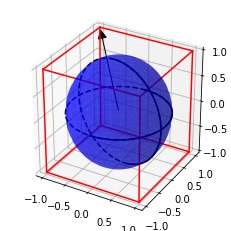

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax =  fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="r")

        
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
#for i in range(2):
#    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
elev = 10.0
rot = 80.0 / 180 * np.pi
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
#calculate vectors for "vertical" circle
a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
b = np.array([0, 1, 0])
b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
horiz_front = np.linspace(0, np.pi, 100)
ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

#ax.view_init(elev = elev, azim = 0)

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, -1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

plt.show()

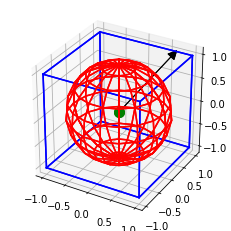

In [23]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax =  fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([], [], [], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
#line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    # draw cube
    r = [-1, 1]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s, e), color="b")
    # draw sphere
    u, v = np.mgrid[0:1*np.pi:10j, 0:2*np.pi:20j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="r")
    # draw a point
    ax.scatter([0], [0], [0], color="g", s=100)

    a.__init__([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    return a,

# animation function.  This is called sequentially
def animate(x):
    ax.artists.remove(a)
    #x = np.sin(2 * np.pi * (0.01 * i))
    #y = np.sin(2 * np.pi * (0.01 * i))
    a.__init__([0, x[0]], [0, x[1]], [0, x[2]], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    return a,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=angular_velocity, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

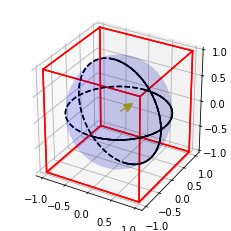

In [73]:
fig = plt.figure()
ax =  fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

arrow = Arrow3D([], [], [], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
#line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    # draw cube
    r = [-1, 1]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s, e), color="r")
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = 1 * np.outer(np.cos(u), np.sin(v))
    y = 1 * np.outer(np.sin(u), np.sin(v))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
    #for i in range(2):
    #    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
    elev = 10.0
    rot = 80.0 / 180 * np.pi
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.05)
    #calculate vectors for "vertical" circle
    a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
    b = np.array([0, 1, 0])
    b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
    ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
    horiz_front = np.linspace(0, np.pi, 100)
    ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
    vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
    ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
    ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

    arrow.__init__([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="y")
    ax.add_artist(arrow)
    return arrow,

# animation function.  This is called sequentially
def animate(x):
    ax.artists.remove(arrow)
    #x = np.sin(2 * np.pi * (0.01 * i))
    #y = np.sin(2 * np.pi * (0.01 * i))
    arrow.__init__([0, x[0]], [0, x[1]], [0, x[2]], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="y")
    ax.add_artist(arrow)
    return arrow,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=angular_velocity, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('animation_blue.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

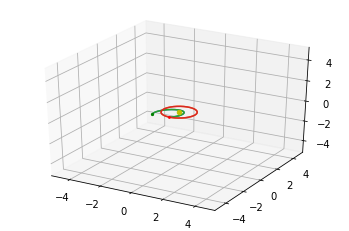

In [4]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax =  fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal')

#ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

earth = ax.scatter([], [], [], color="g", s=5)
asteroid = ax.scatter([], [], [], color="r", s=3)
earth.set_alpha(0.5) # зачем нужен этот альфа?
sun = ax.scatter([0], [0], [0], color="y", s=20)

def init():
    xEarth, yEarth, zEarth, xAsteroid, yAsteroid, zAsteroid = (planets[:,i] for i in range(6))
    ax.plot(xEarth, yEarth, zEarth, label='Earth')
    ax.plot(xAsteroid, yAsteroid, zAsteroid, label='Asteroid')
    global earth;
    global asteroid;
    earth.remove()
    asteroid.remove()
    earth = ax.scatter([0], [0], [0], color="g", s=5)
    asteroid = ax.scatter([0], [0], [0], color="r", s=3)
    return earth, asteroid,

def animate(x): # от куда беруться значения переменной j
    global earth;
    global asteroid;
    earth.remove()
    asteroid.remove()
    earth = ax.scatter([x[0]], [x[1]], [x[2]], color="g", s=5)
    asteroid = ax.scatter([x[3]], [x[4]], [x[5]], color="r", s=3)
    
    #scat = ax.scatter([x[0],x[3]], [x[1],x[4]], [x[2],x[5]], color="g", s=5)
    #scat.set_offsets(([0,j], [j,50], [j,j]))
    return earth, asteroid,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames = planets, interval = 20, blit=True)
anim.save('animation_planets.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

In [13]:
import numpy as np
from math import sqrt
angular_velocity = np.loadtxt('Angular_velocity.dat');
sqrt_vec = np.vectorize(sqrt);
#angular_velocity = angular_velocity/sqrt_vec(sum(angular_velocity.T**2))[:, np.newaxis];
#angular_velocity = angular_velocity[:100, :]
angular_velocity = angular_velocity/sqrt_vec(sum(angular_velocity[0]**2));
print(angular_velocity[0][np.newaxis, :]);
print(angular_velocity[0:2]);
angular_velocity.shape;

[[1. 0. 0.]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -5.18180000e-09  1.24389714e-08]]
